In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)
plt.rc('font', size=30)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=18)
plt.rc('figure', titlesize=20)
plt.rcParams["figure.autolayout"] = True

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

# Data

source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

This database contains 14 physical attributes based on Blood samples are taken from patients as well as from a brief exercise test. 

The target field is indicative of the presense of heart disease (0 for no presence, 1 for presence). 


The goal is to create a model tha can predict the likelihood of heart disease so that expensive and invasive procedures can be better targeted.


Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

In [3]:
df = pd.read_csv('heart.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Exploratory Data Analysis

First we check for any missing or NaN values, which there are not.

In [8]:
df.isnull().values.any()
df.isna().values.any()

False

False

Inspect standard statistics

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Plot the target column which indicates heart disease

<AxesSubplot:xlabel='target', ylabel='count'>

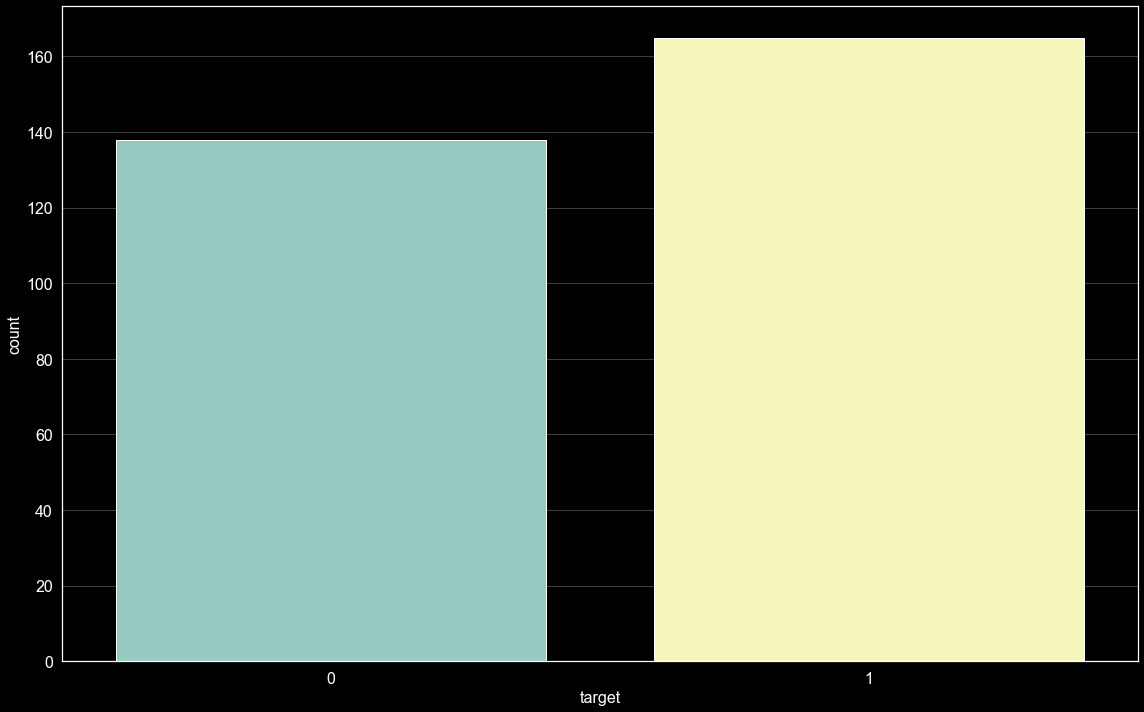

In [42]:
sns.countplot(x=df['target'])

We use a pairplot to display some of the popular columns

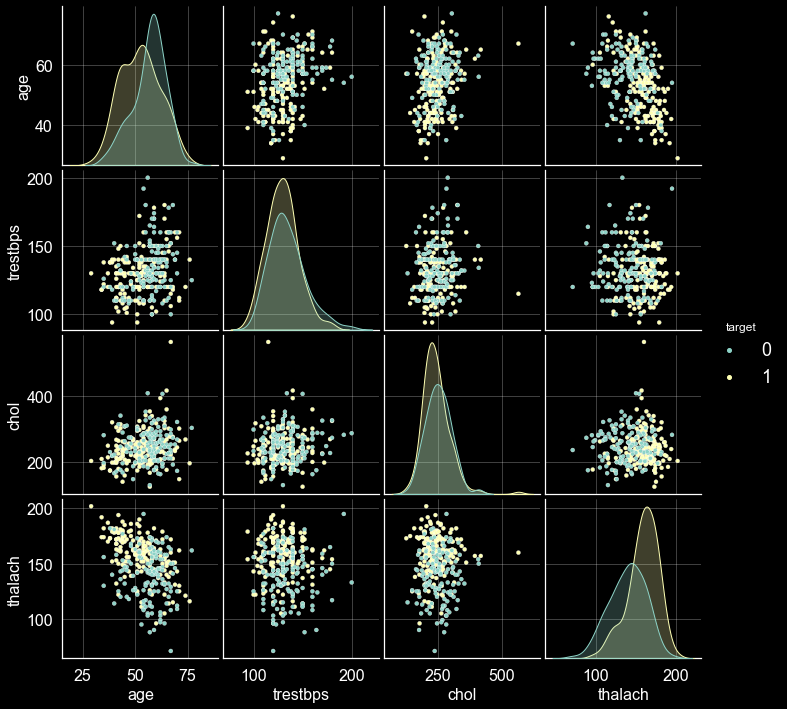

In [41]:
sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']], hue='target')

We create a heatmap that displays the correlation between all features

<Figure size 2400x1600 with 0 Axes>

<AxesSubplot:>

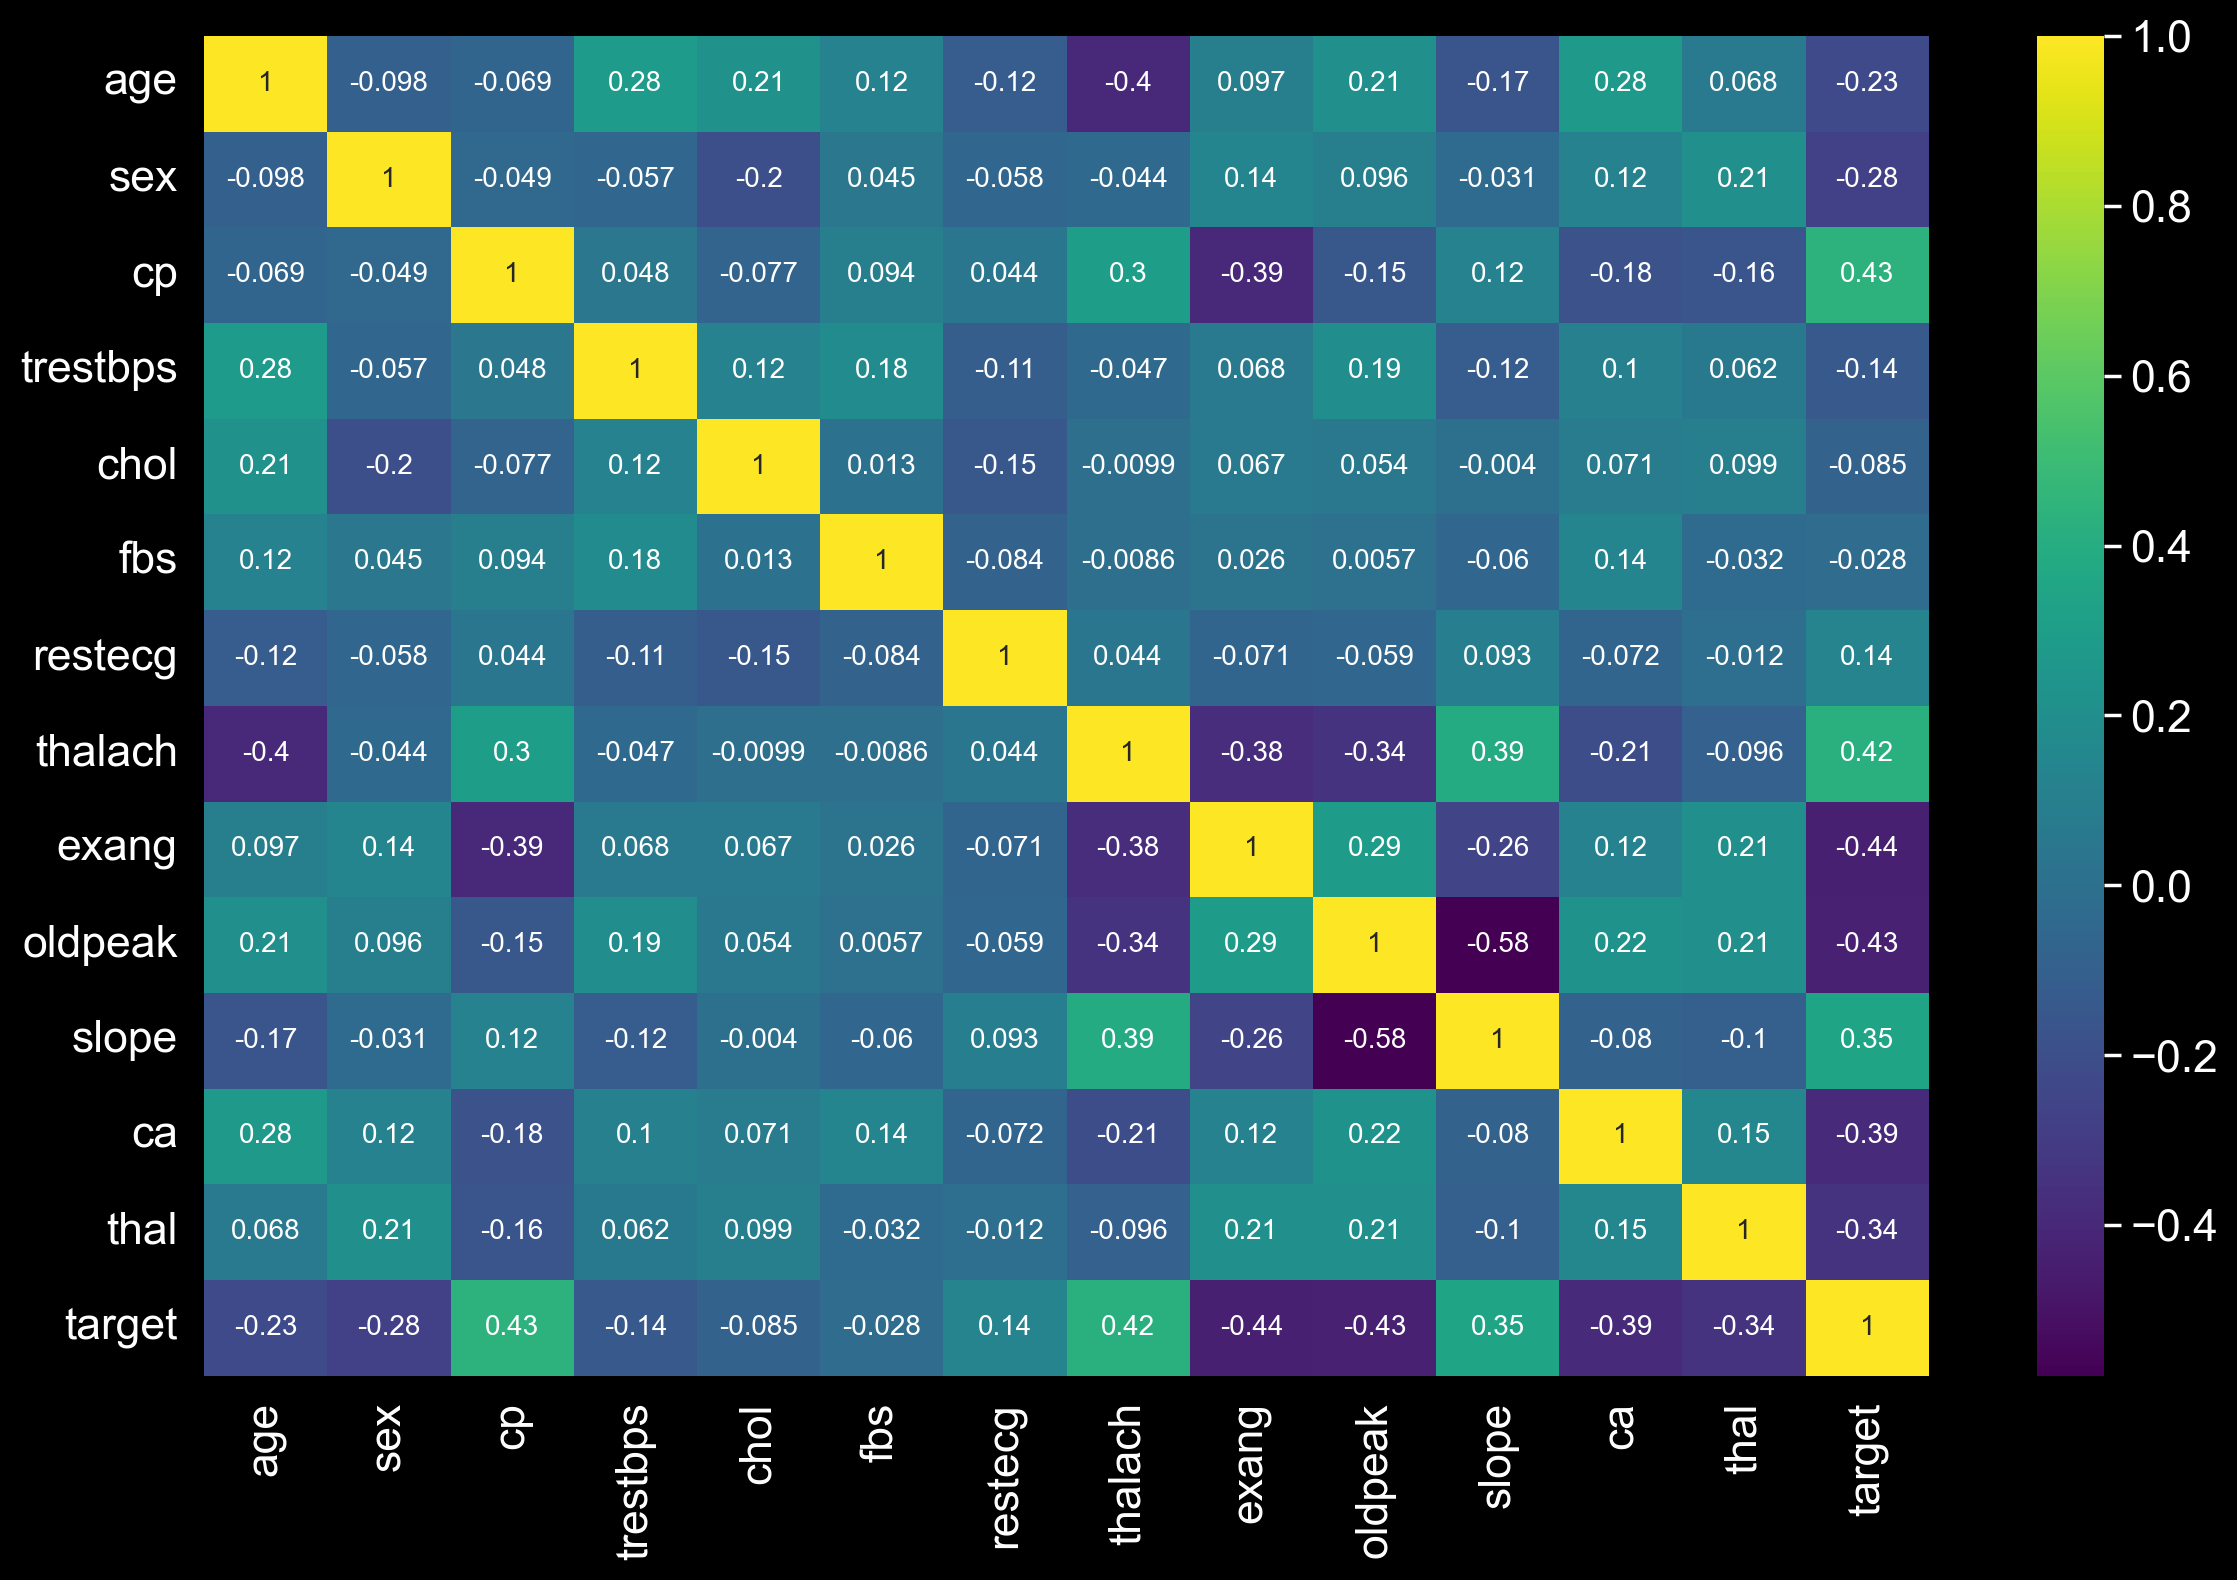

In [40]:
plt.rc('font', size=10)
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

we see that target is quite correlated with cp, thalach and slope. 

# Machine Learning

## Preparation y, X

Define the our variables as y for the target, and as X for all other features

In [7]:
X = df.drop('target', axis=1)
y = df['target']

We then perform a train and split with 10% test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler

We scale further data by removing its mean and setting the deviation to 1.

This is achieved by using the standardized scaler

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)  

where we only fitted the train data in order to avoid data leakage.

## Model

We will create a logistic model in conjunction with Cross Validation in order to find a well performing C value for the hyper-parameter search.

Sklearn actually has a class that includes both called LogisticRegressionCV().

In [14]:
log_model = LogisticRegressionCV()

train the model

In [15]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

Optimal C parameter value

In [16]:
log_model.C_

array([0.04641589])

The parameters of the model

In [17]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

The Coefficients 

In [18]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

a better way to pack them

In [32]:
coefs = pd.Series(index = X.columns, data=log_model.coef_[0]).sort_values(ascending=False)
coefs

cp          0.535347
thalach     0.299141
slope       0.251010
restecg     0.080838
fbs         0.024873
chol       -0.088305
age        -0.096212
trestbps   -0.138502
exang      -0.334382
oldpeak    -0.352386
thal       -0.374486
sex        -0.394602
ca         -0.497358
dtype: float64

and we plot them

<AxesSubplot:>

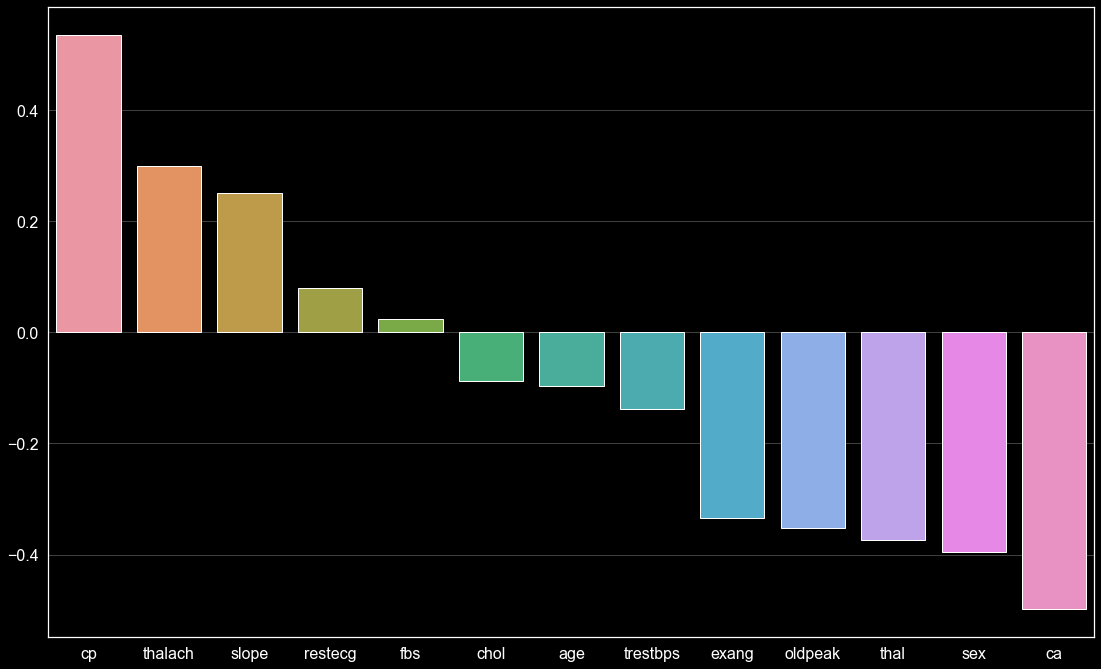

In [36]:
sns.barplot(x=coefs.index, y=coefs.values)

As expected also from the correlation matrix cp, thalach and slope are the prominant coefficients

# Μodel Evaluation

First we calculate the predicted values

In [23]:
y_pred = log_model.predict(scaled_X_test)

Confusion matrix

In [44]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[12,  3],
       [ 2, 14]], dtype=int64)

there are only 5 mistakes (sum of all non-diagonal elements)

In [46]:
off_dia_sum = np.sum(con_mat) - np.trace(con_mat)
off_dia_sum

5

visualize it

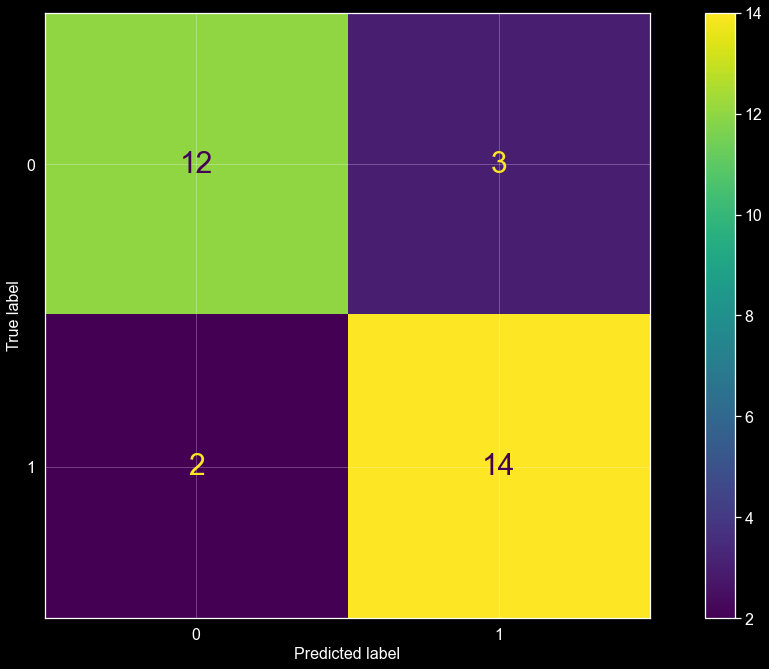

In [35]:
# Set the default text font size
plt.rc('font', size=30)
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

we also calculate the precision, recall, f1-score and support

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



since we are only 5 off, with tuning a bit the parameters even if we drop to 4 that would be a significant difference in precision but it will still be minor compared to volume in data.

## Performance Curves

We plot the  Receiver Operating Characteristic(ROC) curve of our model against the line y=x which reflects completely random classification.
- y=x: True Posivite Rate is equal to the False Positive Rate(TPR = FPT) 

In principle we want our ROC to be above y=x and have its Area Under Curve(AUC) close to 1.

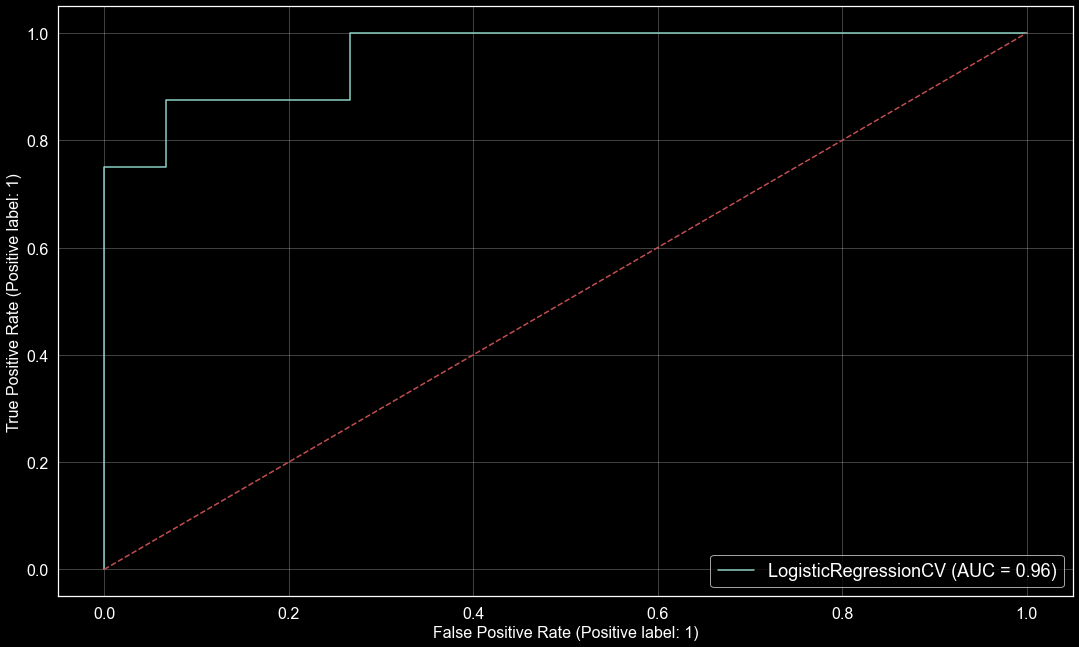

In [69]:
x = np.linspace(0,1,100)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)
plt.plot(x, x, '--r', label='y=x, random classification')

The model seems to perform quite well with AUC=0.96 and curve above y=x. This is to be expected since we had only 5 misclassifications.

We can also probe a similar curve in the plane of Precision and Recall. These type of curves are mostly useful when there is a huge discrepancy between the values of classes.

In our case, since we have a small sample

In [72]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [73]:
df['target'].value_counts().pct_change()

1         NaN
0   -0.163636
Name: target, dtype: float64

the difference between or classes is quite small ~ 16% so there is not really an imbalance of classes.

Nevertheless we will plot the Precision-Recall Curve RPC for completeness. In this case the default curve describing completely random classification is precision=0.5. It will be denoted as a horizontal red line.

We want our RPC curve to be above y=0.5 just like the ROC curve being above y=x.

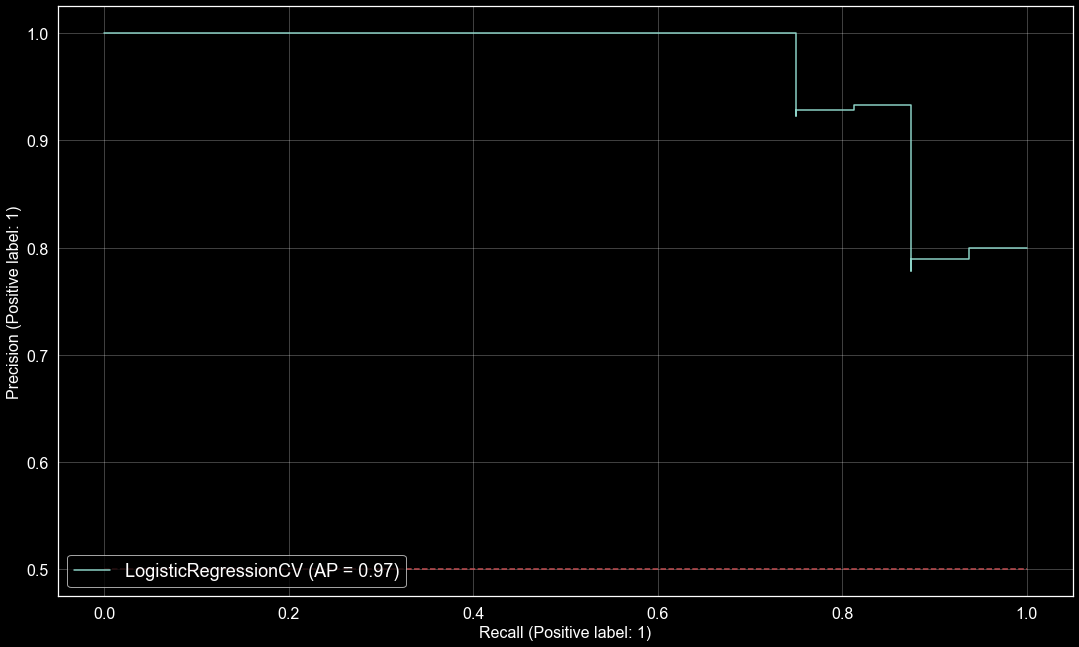

In [68]:
x = np.linspace(0,1,100)
y = np.repeat(0.5, len(x))
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)
plt.plot(x, y, '--r', label='y=0.5, random classification')

Similarly to ROC, our PRC is above y=0.5 and its AP score is close to 1.

Finally let us test a random patient against the model

In [51]:
patient = [
    [ 54. ,   1. ,   0. , 122. ,
     286. ,   0. ,   0. , 116. ,
     1. ,    3.2,   1. ,   2. ,   2. ]
]

The patient is predicted to belong in the target class 0 (no heart disease)

In [52]:
log_model.predict(patient)

array([0], dtype=int64)

the probability per class of this happening is 

In [59]:
(log_model.predict_proba(patient))[0][0]

0.9999998615440825